In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/Users/saisisir/Downloads/Sisir Entain Laptop/Self Learning /Machine Learning/Kaggle Practice/22. K means clustering/fb_Live.csv')

In [3]:
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0


In [4]:
df.drop(['status_id', 'status_published'], axis = 1, inplace = True)

In [5]:
df.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,529,512,262,432,92,3,1,1,0
1,photo,150,0,0,150,0,0,0,0,0
2,video,227,236,57,204,21,1,1,0,0
3,photo,111,0,0,111,0,0,0,0,0
4,photo,213,0,0,204,9,0,0,0,0


In [6]:
pd.set_option('display.max_columns', None)

In [7]:
x = df

In [8]:
x.dtypes

status_type      object
num_reactions     int64
num_comments      int64
num_shares        int64
num_likes         int64
num_loves         int64
num_wows          int64
num_hahas         int64
num_sads          int64
num_angrys        int64
dtype: object

In [9]:
#importing labelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

x['status_type'] = le.fit_transform(x['status_type'])

In [10]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1,11):
    km = KMeans(n_clusters = i, init= 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit_predict(x)
    wcss.append(km.inertia_)

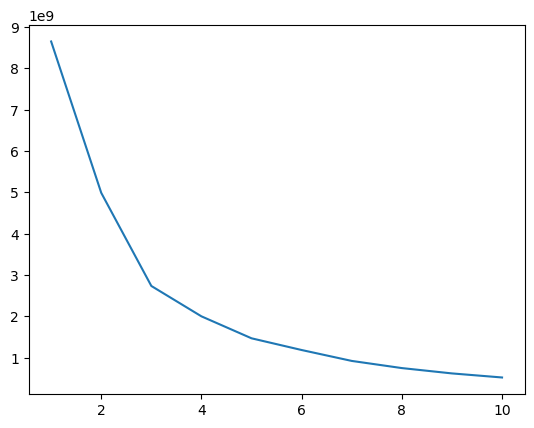

In [11]:
#Elbow PLot    
plt.plot(range(1,11), wcss)

In [12]:
#WE found the number of clusters to be 3
x = df.iloc[:, :].values
km = KMeans(n_clusters = 4)
y_means = km.fit_predict(x)

/Users/saisisir/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


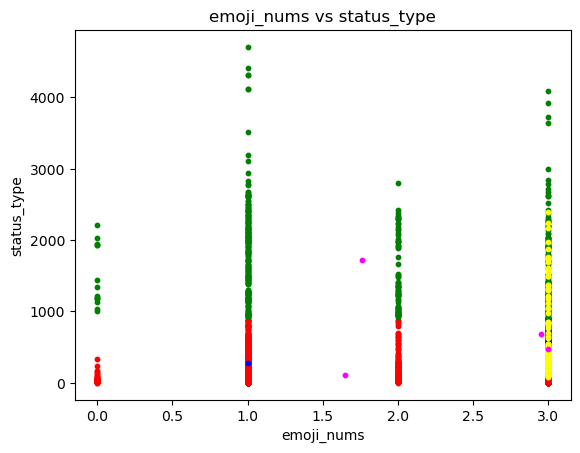

In [14]:
plt.scatter(x[y_means == 0,0], x[y_means == 0, 1], s = 10, c = 'red', label = 'Cluster 1')
plt.scatter(x[y_means == 1,0], x[y_means == 1, 1], s = 10, c = 'blue', label = 'Cluster 2')
plt.scatter(x[y_means == 2,0], x[y_means == 2, 1], s = 10, c = 'green', label = 'Cluster 3')
plt.scatter(x[y_means == 3,0], x[y_means == 3, 1], s = 10, c = 'yellow', label = 'Cluster 4')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:,1], s = 10, c = 'magenta', label = 'Centroid')
plt.title('emoji_nums vs status_type')
plt.xlabel('emoji_nums')
plt.ylabel('status_type')
plt.show()

In [16]:
from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler()

x_new = ms.fit_transform(x)

In [19]:
wcss = []

for i in range(1,11):
    km = KMeans(n_clusters = i, init= 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit_predict(x_new)
    wcss.append(km.inertia_)

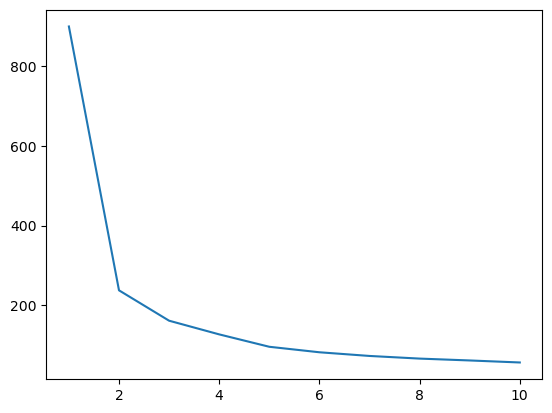

In [20]:
#Elbow PLot    
plt.plot(range(1,11), wcss)

In [22]:
#WE found the number of clusters to be 3
x_new1 = df.iloc[:, :].values
km = KMeans(n_clusters = 4)
y_means = km.fit_predict(x_new1)

/Users/saisisir/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


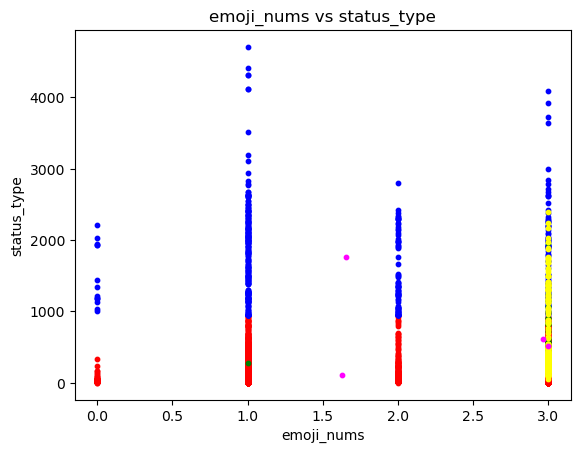

In [23]:
plt.scatter(x_new1[y_means == 0,0], x_new1[y_means == 0, 1], s = 10, c = 'red', label = 'Cluster 1')
plt.scatter(x_new1[y_means == 1,0], x_new1[y_means == 1, 1], s = 10, c = 'blue', label = 'Cluster 2')
plt.scatter(x_new1[y_means == 2,0], x_new1[y_means == 2, 1], s = 10, c = 'green', label = 'Cluster 3')
plt.scatter(x_new1[y_means == 3,0], x_new1[y_means == 3, 1], s = 10, c = 'yellow', label = 'Cluster 4')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:,1], s = 10, c = 'magenta', label = 'Centroid')
plt.title('emoji_nums vs status_type')
plt.xlabel('emoji_nums')
plt.ylabel('status_type')
plt.show()